# Experiment No.2 Autoencoders and Variational Autoencoders (VAE)  
 1. Build a simple AE model for Dimensionality Reduction and Denoising.

 2.Generate realistic faces or interpolate between facial features for creative applications in entertainment and design using VAE.


 **Name:- Gourav Sable** \
 **PRN/roll no. :- 202302040019**

 Collab Link : https://colab.research.google.com/drive/1acpDVgKMXwD92upm9EM2_ywginPzTq18?usp=sharing



# Part A — Autoencoder (AE)

**Theory (quick):** An autoencoder learns an encoding function `z = f(x)` and a decoding function `x' = g(z)` by minimizing reconstruction loss `||x - x'||^2`. The *bottleneck* (latent vector) acts as dimensionality reduction. For denoising, we train the AE to reconstruct clean inputs from noisy inputs.


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
from keras.datasets import mnist


print("numpy:", np.__version__)


numpy: 2.0.2


In [ ]:

# Load and normalize MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Model
input_img = Input(shape=(28, 28))
flat = Flatten()(input_img)
encoded = Dense(64, activation='relu')(flat)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(28*28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28))(decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Training
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    verbose=2
)

Epoch 1/10
235/235 - 4s - 15ms/step - loss: 0.0741 - val_loss: 0.0528
Epoch 2/10
235/235 - 2s - 10ms/step - loss: 0.0474 - val_loss: 0.0418
Epoch 3/10
235/235 - 4s - 18ms/step - loss: 0.0389 - val_loss: 0.0363
Epoch 4/10
235/235 - 5s - 19ms/step - loss: 0.0354 - val_loss: 0.0338
Epoch 5/10
235/235 - 3s - 11ms/step - loss: 0.0333 - val_loss: 0.0323
Epoch 6/10
235/235 - 2s - 9ms/step - loss: 0.0321 - val_loss: 0.0313
Epoch 7/10
235/235 - 2s - 10ms/step - loss: 0.0313 - val_loss: 0.0305
Epoch 8/10
235/235 - 3s - 13ms/step - loss: 0.0304 - val_loss: 0.0297
Epoch 9/10
235/235 - 2s - 9ms/step - loss: 0.0297 - val_loss: 0.0291
Epoch 10/10
235/235 - 2s - 9ms/step - loss: 0.0292 - val_loss: 0.0287


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


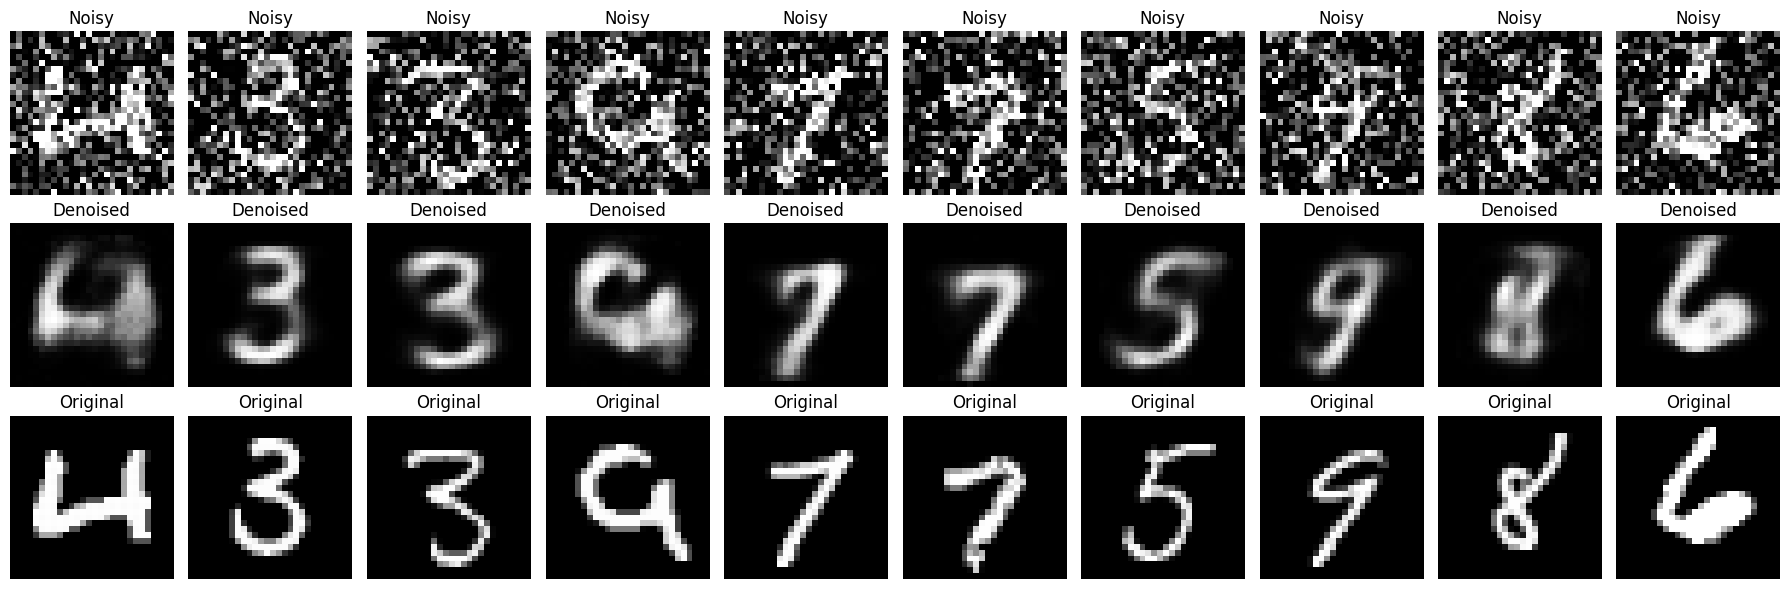

In [ ]:
def display_random_results(n=10):
    # Ensure the sample size does not exceed the number of test images
    n = min(n, x_test.shape[0])
    idxs = np.random.choice(x_test.shape[0], n, replace=False)
    noisy_imgs = x_test_noisy[idxs]
    decoded_imgs = autoencoder.predict(noisy_imgs)
    originals = x_test[idxs]
    plt.figure(figsize=(18, 6))
    for i in range(n):
        # Noisy
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_imgs[i], cmap='gray')
        plt.title("Noisy")
        plt.axis("off")
        # Denoised
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded_imgs[i], cmap='gray')
        plt.title("Denoised")
        plt.axis("off")
        # Original
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(originals[i], cmap='gray')
        plt.title("Original")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call this function (can be re-run to get different results each time)
display_random_results(n=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - kl_loss: 3.2677 - loss: 212.8385 - reconstruction_loss: 209.5708 - val_kl_loss: 3.5892 - val_loss: 195.0343 - val_reconstruction_loss: 191.4451
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - kl_loss: 5.6016 - loss: 177.3980 - reconstruction_loss: 171.7964 - val_kl_loss: 6.1706 - val_loss: 170.8236 - val_reconstruction_loss: 164.6530
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 6.1098 - loss: 167.0207 - reconstruction_loss: 160.9109 - val_kl_loss: 6.2652 - val_loss: 167.0290 - val_reconstruction_loss: 160.7639
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 6.2643 - loss: 162.4363 - reconstruction_loss: 156.1719 - val_kl_loss: 6.5781 - val_loss: 159.5593 - val_reconstruction_loss: 152.9812
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 6.3740 - loss: 159.6197 - reconstruction_loss: 153.2457 - val_kl_loss: 6.4870 - val_loss: 1

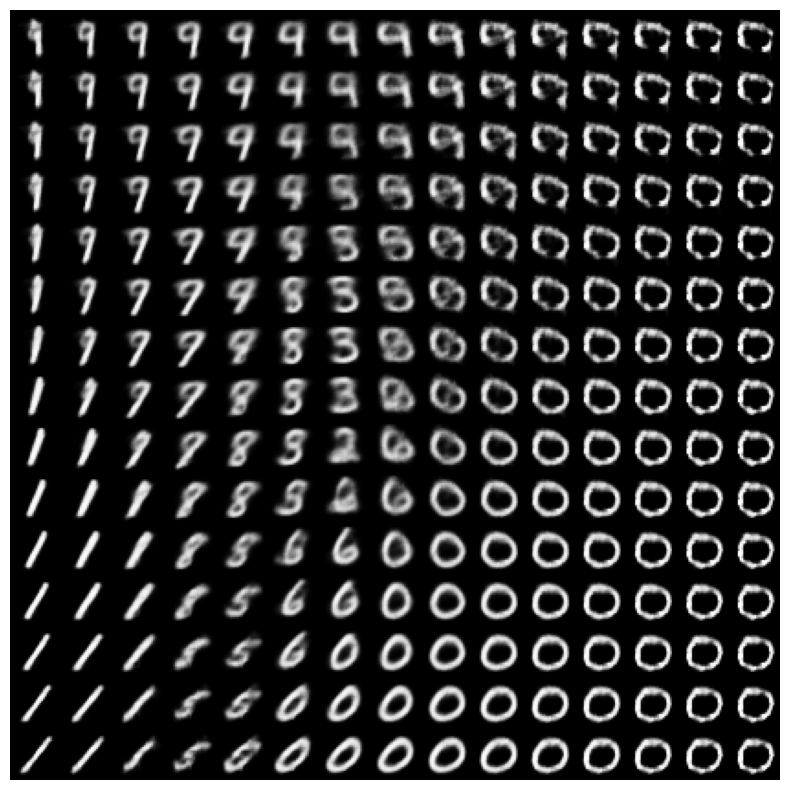

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


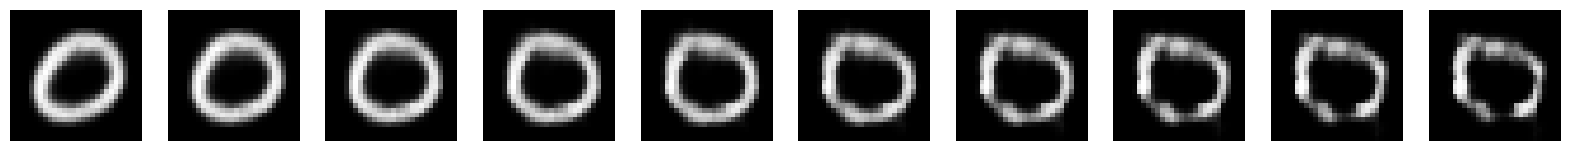

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Parameters
latent_dim = 2  # latent space dimension

# Load and preprocess MNIST data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train.astype("float32") / 255., -1)
x_test = np.expand_dims(x_test.astype("float32") / 255., -1)

# Sampling layer to sample latent vector z
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Build Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Build Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Custom VAE Model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def compute_loss(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = reconstruction_loss + kl_loss
        return total_loss, reconstruction_loss, kl_loss

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            total_loss, reconstruction_loss, kl_loss = self.compute_loss(data)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        total_loss, reconstruction_loss, kl_loss = self.compute_loss(data)
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

# Instantiate and compile model
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Train
vae.fit(x_train, epochs=10, batch_size=128, validation_data=(x_test, None))

# Function to visualize latent space digit generation
def plot_latent_space(decoder, n=15, figsize=10):
    digit_size = 28
    scale = 2.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap="Greys_r")
    plt.axis("off")
    plt.show()

plot_latent_space(decoder)

# Function to interpolate between two points in latent space
def interpolate_digits(decoder, z_point1, z_point2, steps=10):
    z_interp = np.linspace(0, 1, steps)[:, None] * z_point2 + (1 - np.linspace(0, 1, steps)[:, None]) * z_point1
    decoded = decoder.predict(z_interp)
    plt.figure(figsize=(20, 2))
    for i in range(steps):
        plt.subplot(1, steps, i + 1)
        plt.imshow(decoded[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

# Random interpolation example
z1 = np.random.randn(1, latent_dim)
z2 = np.random.randn(1, latent_dim)
interpolate_digits(decoder, z1, z2)


# Part B — Variational Autoencoder (VAE) for Faces

**Theory (quick):** A VAE encodes inputs into a latent distribution `q(z|x)` (mean and log-variance). During training we sample `z ~ q(z|x)` using the *reparameterization trick*: `z = mu + exp(0.5*logvar)*epsilon`. The objective is reconstruction loss plus KL divergence between `q(z|x)` and prior `p(z)=N(0,I)`.

We'll use the **Oliveitti faces** dataset (grayscale 64x64) available from `sklearn.datasets.fetch_olivetti_faces`.

We'll implement a small convolutional VAE in Keras and include code to:
- Train the VAE
- Sample new faces from prior `N(0,I)`
- Interpolate in latent space between two faces and decode intermediate images


In [ ]:
# Imports & dataset for VAE
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load faces
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
Xf = faces.images.astype("float32")  # shape (400, 64, 64)
Xf = Xf[..., np.newaxis]  # (n,64,64,1)
print("Faces shape:", Xf.shape)

Xf_train, Xf_test = train_test_split(Xf, test_size=0.2, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Faces shape: (400, 64, 64, 1)


In [ ]:
# VAE implementation (convolutional) using tensorflow.keras
# Import tensorflow and keras modules
try:
    import tensorflow as tf
    from tensorflow.keras import layers, Model
except Exception as e:
    raise ImportError("TensorFlow not available. Install via: pip install tensorflow") from e


img_shape = Xf_train.shape[1:]  # (64, 64, 1)
latent_dim = 64


# Define the Encoder
def build_encoder(img_shape, latent_dim):
    enc_inputs = layers.Input(shape=img_shape)
    x = layers.Conv2D(32, 3, strides=2, padding="same", activation="relu")(enc_inputs)  # 32x32
    x = layers.Conv2D(64, 3, strides=2, padding="same", activation="relu")(x)           # 16x16
    x = layers.Conv2D(128, 3, strides=2, padding="same", activation="relu")(x)          # 8x8
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_logvar = layers.Dense(latent_dim, name="z_logvar")(x)
    return Model(enc_inputs, [z_mean, z_logvar], name="encoder")


# Define the Decoder
def build_decoder(latent_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(8 * 8 * 128, activation="relu")(latent_inputs)
    x = layers.Reshape((8, 8, 128))(x)
    x = layers.Conv2DTranspose(128, 3, strides=2, padding="same", activation="relu")(x)  # 16x16
    x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", activation="relu")(x)   # 32x32
    x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", activation="relu")(x)   # 64x64
    dec_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
    return Model(latent_inputs, dec_outputs, name="decoder")


# Define VAE as a custom Model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, data):
        z_mean, z_logvar = self.encoder(data)
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        z = z_mean + tf.exp(0.5 * z_logvar) * epsilon
        reconstruction = self.decoder(z)
        return z_mean, z_logvar, reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_logvar, reconstruction = self(data)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(
                    tf.keras.layers.Flatten()(data),
                    tf.keras.layers.Flatten()(reconstruction),
                )
            )
            kl_loss = -0.5 * tf.reduce_sum(1 + z_logvar - tf.square(z_mean) - tf.exp(z_logvar), axis=1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        z_mean, z_logvar, reconstruction = self(data)
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(
                tf.keras.layers.Flatten()(data),
                tf.keras.layers.Flatten()(reconstruction),
            )
        )
        kl_loss = -0.5 * tf.reduce_sum(1 + z_logvar - tf.square(z_mean) - tf.exp(z_logvar), axis=1)
        kl_loss = tf.reduce_mean(kl_loss)
        total_loss = reconstruction_loss + kl_loss
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


# Instantiate and compile the VAE model
encoder = build_encoder(img_shape, latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())


# Show summaries
vae.encoder.summary()
vae.decoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 32,    │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 16, 16,    │     18,496 │ conv2d_14[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ conv2d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 8192)      │          0 │ conv2d_16[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │  2,097,408 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │     16,448 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_logvar (Dense)    │ (None, 64)        │     16,448 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,222,976 (8.48 MB)

 Trainable params: 2,222,976 (8.48 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8192)           │       532,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 16, 16, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 772,609 (2.95 MB)

 Trainable params: 772,609 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training VAE (reduce epochs if CPU-only)
history = vae.fit(Xf_train, epochs=50, batch_size=32, validation_data=(Xf_test, None))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - kl_loss: 0.0894 - loss: 0.7809 - reconstruction_loss: 0.6915 - val_kl_loss: 4.6021e-04 - val_loss: 0.6865 - val_reconstruction_loss: 0.6861
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - kl_loss: 4.5130e-04 - loss: 0.6880 - reconstruction_loss: 0.6876 - val_kl_loss: 2.8600e-04 - val_loss: 0.6828 - val_reconstruction_loss: 0.6825
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - kl_loss: 2.2206e-04 - loss: 0.6840 - reconstruction_loss: 0.6838 - val_kl_loss: 6.6225e-05 - val_loss: 0.6781 - val_reconstruction_loss: 0.6780
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - kl_loss: 5.0599e-05 - loss: 0.6783 - reconstruction_loss: 0.6783 - val_kl_loss: 2.5228e-05 - val_loss: 0.6748 - val_reconstruction_loss: 0.6748
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - kl_loss: 2.1902e-05 - loss: 0.6764 - reconstruction_loss: 0.6764 - val_kl_loss: 1.2246e-05 - val_loss: 0.6713 - val_reconstruction_loss: 0.6713
Epoch 6/50
10/10 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


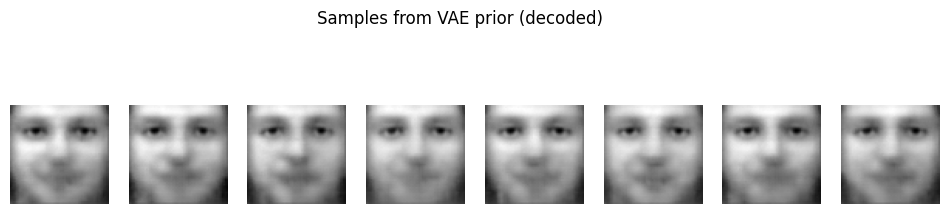

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


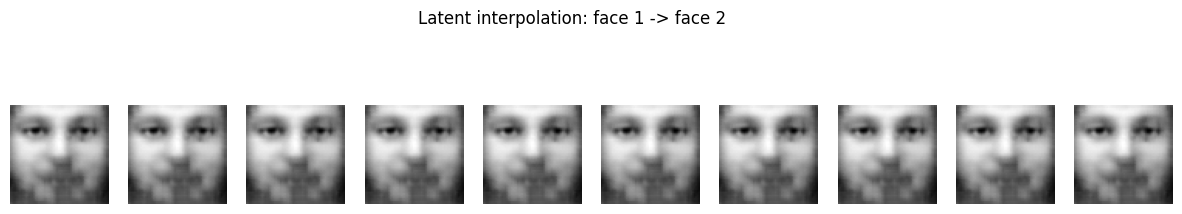

In [ ]:
# Sampling from prior to generate new faces
n = 8
z_samples = np.random.normal(size=(n, latent_dim))
gen = vae.decoder.predict(z_samples)

plt.figure(figsize=(12, 3))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(gen[i].squeeze(), cmap="gray")
    ax.axis("off")
plt.suptitle("Samples from VAE prior (decoded)")
plt.show()

# Latent interpolation between two test faces
def interpolate(z1, z2, steps=8):
    ratios = np.linspace(0, 1, steps)
    vecs = np.array([(1 - r) * z1 + r * z2 for r in ratios])
    return vecs

# Pick two faces indices
i1, i2 = 10, 50

# Get the latent space means for the two faces using vae.predict()
z_mean1, z_logvar1, _ = vae.predict(Xf_test[i1 : i1 + 1])
z_mean2, z_logvar2, _ = vae.predict(Xf_test[i2 : i2 + 1])

# Use means for smooth interpolation
vecs = interpolate(z_mean1[0], z_mean2[0], steps=10)

# Decode latent interpolations
decodes = vae.decoder.predict(vecs)

plt.figure(figsize=(15, 3))
for i in range(len(decodes)):
    ax = plt.subplot(1, len(decodes), i + 1)
    plt.imshow(decodes[i].squeeze(), cmap="gray")
    ax.axis("off")
plt.suptitle("Latent interpolation: face 1 -> face 2")
plt.show()

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "divyagatkal007"
os.environ['KAGGLE_KEY'] = "ac9af06b64a8e90daab20b12d95b899b"



!kaggle datasets download -d vishesh1412/celebrity-face-image-dataset

Dataset URL: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset
License(s): CC0-1.0
  0% 0.00/52.9M [00:00<?, ?B/s]
100% 52.9M/52.9M [00:00<00:00, 1.22GB/s]


In [5]:
!unzip -o /content/celebrity-face-image-dataset.zip -d /content/data

Archive:  /content/celebrity-face-image-dataset.zip
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: /content/data/Celebrity Faces Dataset/Angelina Jolie/011_7344ca35.jpg  
  inflating: 

Device: cuda
Total images: 1800
Epoch 01/50  Avg Total: 3776.6737  Recon: 3743.9116  KL: 32.7621
Epoch 02/50  Avg Total: 2971.8880  Recon: 2915.3027  KL: 56.5852
Epoch 03/50  Avg Total: 2086.0424  Recon: 1991.5370  KL: 94.5054
Epoch 04/50  Avg Total: 1757.1587  Recon: 1646.5171  KL: 110.6415
Epoch 05/50  Avg Total: 1617.9482  Recon: 1496.1616  KL: 121.7866
Epoch 06/50  Avg Total: 1522.2299  Recon: 1393.0727  KL: 129.1572
Epoch 07/50  Avg Total: 1451.9008  Recon: 1313.6183  KL: 138.2824
Epoch 08/50  Avg Total: 1361.3307  Recon: 1219.7390  KL: 141.5916
Epoch 09/50  Avg Total: 1328.2932  Recon: 1182.4453  KL: 145.8479
Epoch 10/50  Avg Total: 1270.8047  Recon: 1122.0677  KL: 148.7370
Epoch 11/50  Avg Total: 1239.5983  Recon: 1088.8683  KL: 150.7300
Epoch 12/50  Avg Total: 1207.7888  Recon: 1052.4301  KL: 155.3587
Epoch 13/50  Avg Total: 1182.7031  Recon: 1027.6631  KL: 155.0400
Epoch 14/50  Avg Total: 1135.5032  Recon: 977.6843  KL: 157.8190
Epoch 15/50  Avg Total: 1091.3282  Recon: 933.57

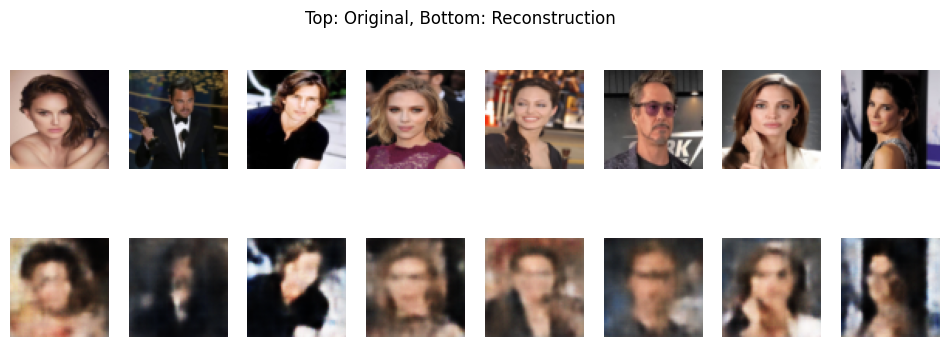

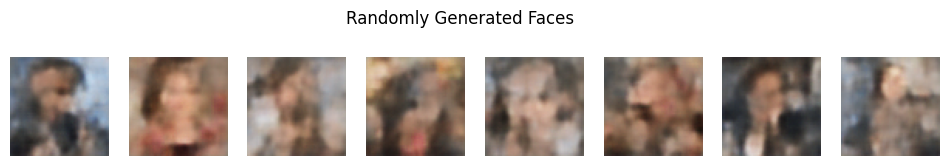

Saved generated samples to /content/outputs/generated_samples.png


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# --------------------
# Settings
# --------------------
data_dir = "/content/data/Celebrity Faces Dataset"   # your extracted folder
out_dir = "/content/outputs"
os.makedirs(out_dir, exist_ok=True)

img_size = 64
batch_size = 64        # reduce if you run out of GPU memory
latent_dim = 256
epochs = 50
lr = 1e-3
num_workers = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# --------------------
# Data loader
# --------------------
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])   # normalize to [-1,1]
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)

print("Total images:", len(dataset))
if len(dataset) == 0:
    raise SystemExit("No images found. Check data_dir path.")

# Helper: denormalize before displaying
def denorm(x):
    return (x * 0.5 + 0.5).clamp(0,1)

# --------------------
# Conv-VAE model
# --------------------
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),  # 64 -> 32
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, 4, 2, 1), # 32 -> 16
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),# 16 -> 8
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1),# 8 -> 4
            nn.ReLU(inplace=True)
        )
        self.fc_mu = nn.Linear(256*4*4, latent_dim)
        self.fc_logvar = nn.Linear(256*4*4, latent_dim)

    def forward(self, x):
        h = self.conv(x)
        h = h.view(h.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 256*4*4)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # 4 -> 8
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 8 -> 16
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),   # 16 -> 32
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),    # 32 -> 64
            nn.Tanh()                              # output in [-1,1]
        )

    def forward(self, z):
        h = self.fc(z)
        h = h.view(h.size(0), 256, 4, 4)
        x_hat = self.deconv(h)
        return x_hat

class VAE(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar

# --------------------
# Loss (MSE + KL)
# --------------------
def loss_function(recon_x, x, mu, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    total = recon_loss + kl_loss
    return total, recon_loss, kl_loss

# --------------------
# Initialize model and optimizer
# --------------------
model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

# --------------------
# Training loop
# --------------------
model.train()
n_images = len(dataset)
for epoch in range(1, epochs + 1):
    epoch_total = 0.0
    epoch_recon = 0.0
    epoch_kl = 0.0
    for batch_idx, (x, _) in enumerate(loader):
        x = x.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = model(x)
        loss, recon_loss, kl_loss = loss_function(recon, x, mu, logvar)
        loss.backward()
        optimizer.step()

        epoch_total += loss.item()
        epoch_recon += recon_loss.item()
        epoch_kl += kl_loss.item()

    avg_total = epoch_total / n_images
    avg_recon = epoch_recon / n_images
    avg_kl = epoch_kl / n_images
    print(f"Epoch {epoch:02d}/{epochs}  Avg Total: {avg_total:.4f}  Recon: {avg_recon:.4f}  KL: {avg_kl:.4f}")

    # Save intermediate reconstruction
    model.eval()
    with torch.no_grad():
        batch, _ = next(iter(loader))
        batch = batch.to(device)
        recon, _, _ = model(batch)
        n_show = min(8, batch.size(0))
        orig_and_recon = torch.cat([denorm(batch[:n_show]), denorm(recon[:n_show])], dim=0)
        grid = utils.make_grid(orig_and_recon, nrow=n_show)
        utils.save_image(grid, os.path.join(out_dir, f"recon_epoch_{epoch:02d}.png"))
    model.train()

# --------------------
# Save final model
# --------------------
torch.save(model.state_dict(), os.path.join(out_dir, "conv_vae_celebrity.pth"))
print("Saved model to", os.path.join(out_dir, "conv_vae_celebrity.pth"))

# --------------------
# Show reconstructions + samples
# --------------------
model.eval()
with torch.no_grad():
    batch, _ = next(iter(loader))
    batch = batch.to(device)
    recon, _, _ = model(batch)
    n_show = min(8, batch.size(0))

    plt.figure(figsize=(12,4))
    for i in range(n_show):
        plt.subplot(2, n_show, i+1)
        plt.imshow(denorm(batch[i]).permute(1,2,0).cpu())
        plt.axis("off")
    for i in range(n_show):
        plt.subplot(2, n_show, n_show + i + 1)
        plt.imshow(denorm(recon[i]).permute(1,2,0).cpu())
        plt.axis("off")
    plt.suptitle("Top: Original, Bottom: Reconstruction")
    plt.show()

    # Save final recon grid
    orig_and_recon = torch.cat([denorm(batch[:n_show]), denorm(recon[:n_show])], dim=0)
    grid = utils.make_grid(orig_and_recon, nrow=n_show)
    utils.save_image(grid, os.path.join(out_dir, "final_recon.png"))

    # Generate random samples
    z = torch.randn(n_show, latent_dim).to(device)
    samples = model.decoder(z)
    plt.figure(figsize=(12,2))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(denorm(samples[i]).permute(1,2,0).cpu())
        plt.axis("off")
    plt.suptitle("Randomly Generated Faces")
    plt.show()

    utils.save_image(denorm(samples), os.path.join(out_dir, "generated_samples.png"), nrow=n_show)
    print("Saved generated samples to", os.path.join(out_dir, "generated_samples.png"))


In [ ]:
print('hi')

hi
